In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
#from dataprep.eda import plot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold,train_test_split
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\1844547942.py:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [3]:
turbine = pd.read_csv('F:/Sampada/Sampada/Assignments/Neural Network/gas_turbines.csv')
turbine

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
turbine.isnull().any()

AT      False
AP      False
AH      False
AFDP    False
GTEP    False
TIT     False
TAT     False
TEY     False
CDP     False
CO      False
NOX     False
dtype: bool

In [5]:
turbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
turbine.shape

(15039, 11)

In [7]:
turbine.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [8]:
turbine.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [9]:
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [10]:
turbine[turbine.duplicated()].shape

(0, 11)

In [11]:
turbine[turbine.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [12]:
turbine.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [13]:
turbine.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [15]:
numerical_features = turbine.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

C:\Users\sonali jante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


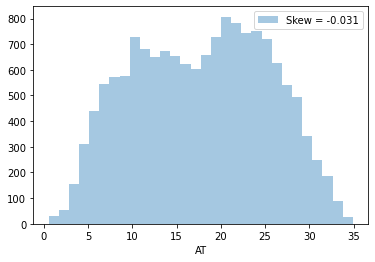

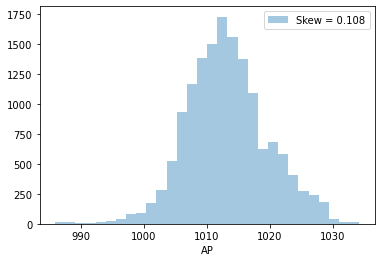

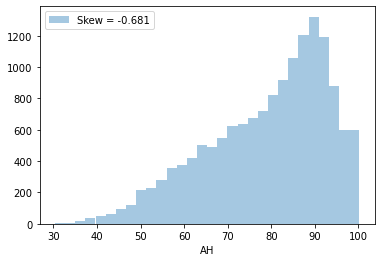

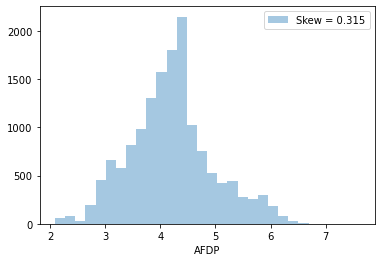

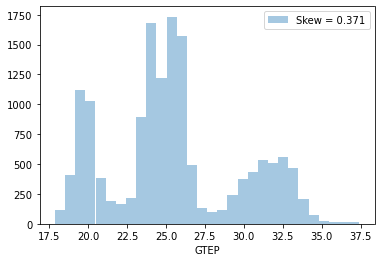

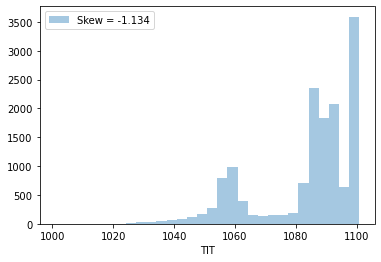

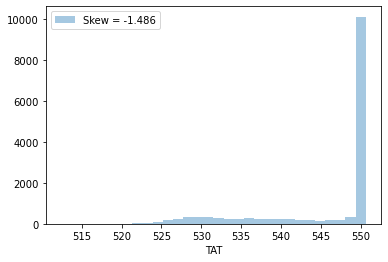

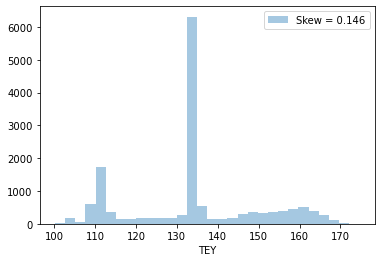

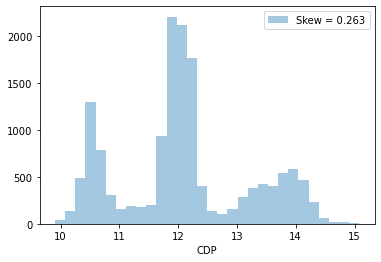

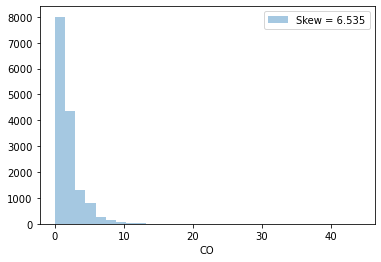

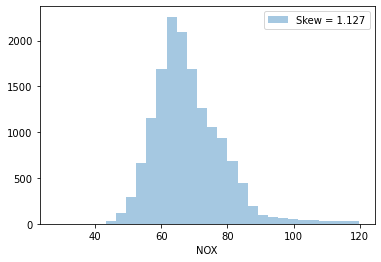

In [17]:
for feat in numerical_features:
    skew = turbine[feat].skew()
    sns.distplot(turbine[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [20]:
# Detect observations with more than three outlier

def outlier_hunt(df):
    outlier_indices = []
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 3 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 3 )
    return multiple_outliers   

print('The dataset contains %d observations with more than 3 outliers' %(len(outlier_hunt(turbine[numerical_features])))) 

The dataset contains 879 observations with more than 3 outliers


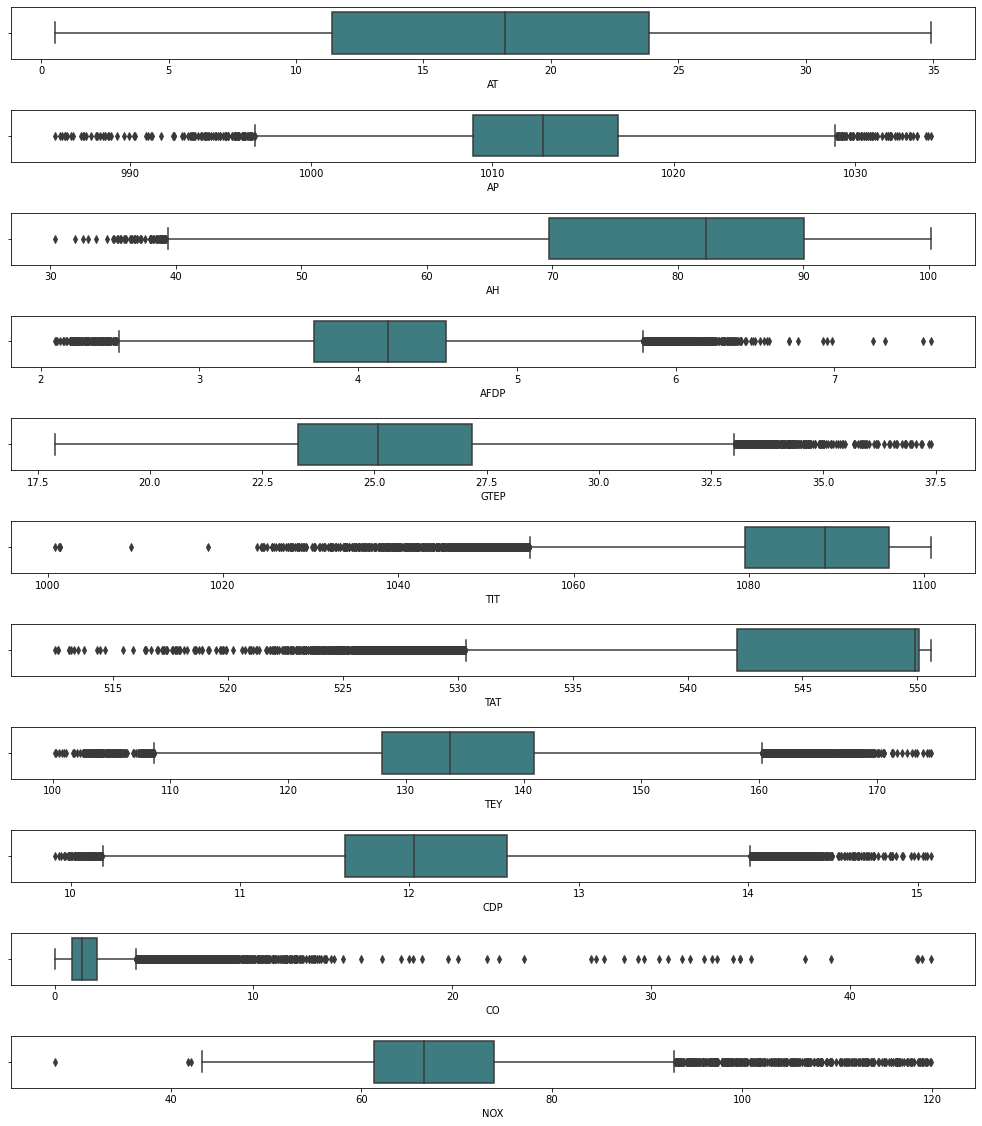

In [21]:
df=turbine.copy() 

fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=df,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=df,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=df,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=df,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=df,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=df,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=df,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=df,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

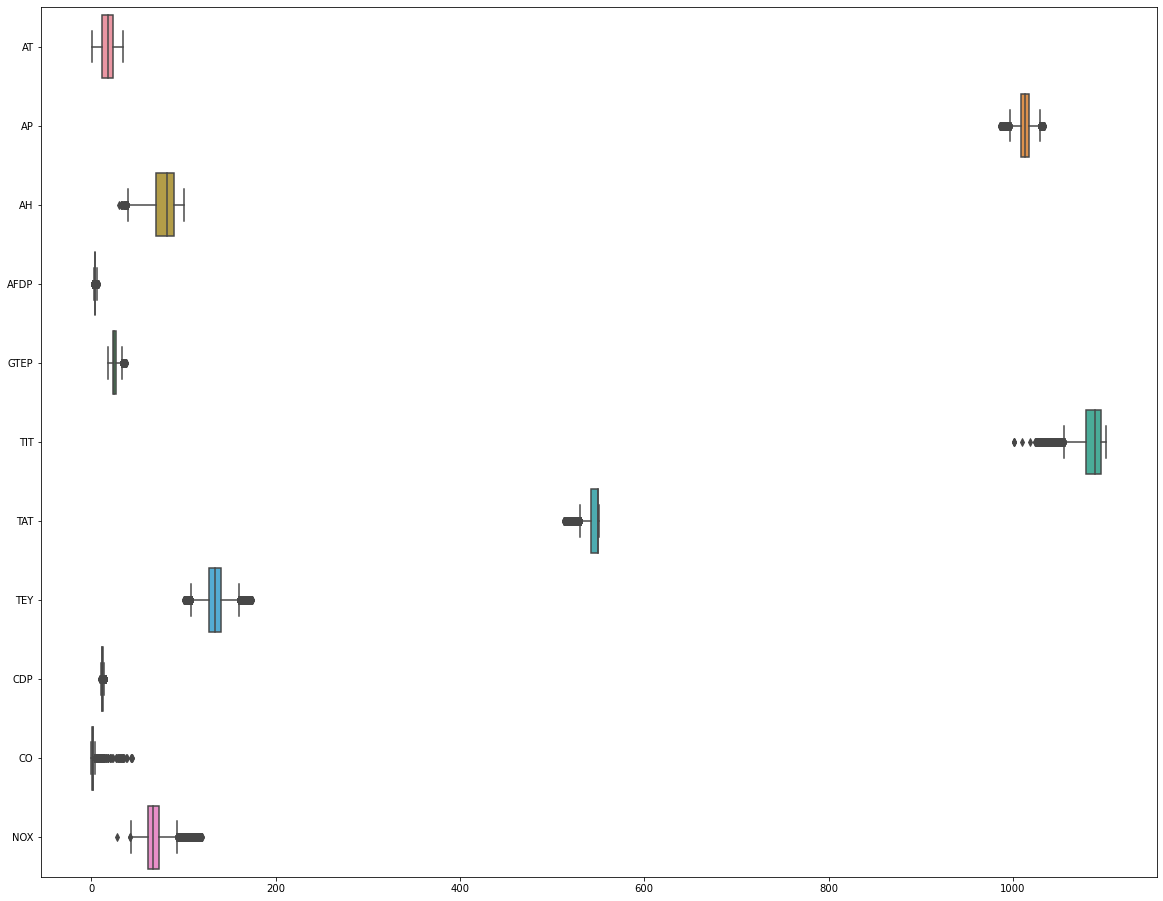

In [22]:
plt.figure(figsize=(20,16))
sns.boxplot(data=turbine[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target Column')

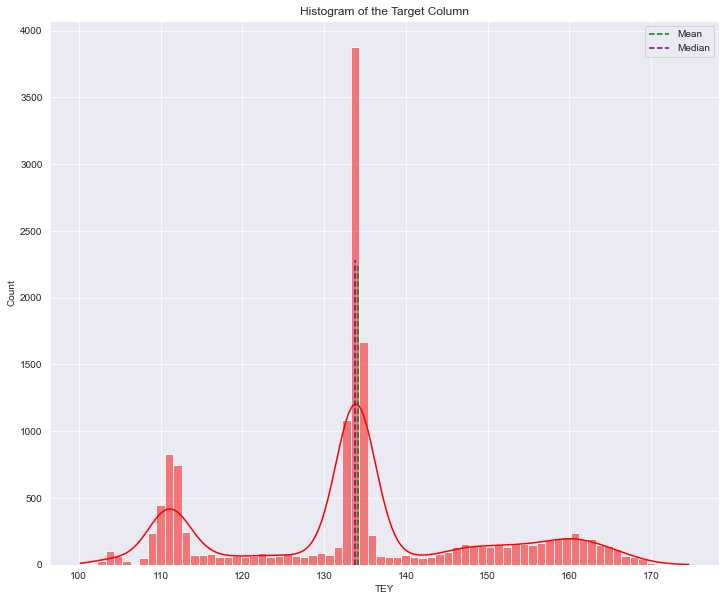

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=turbine,x="TEY",color="red",kde=True)
plt.axvline(x=turbine["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=turbine["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")

Text(0.5, 1.0, 'Cumulative of the Target Column')

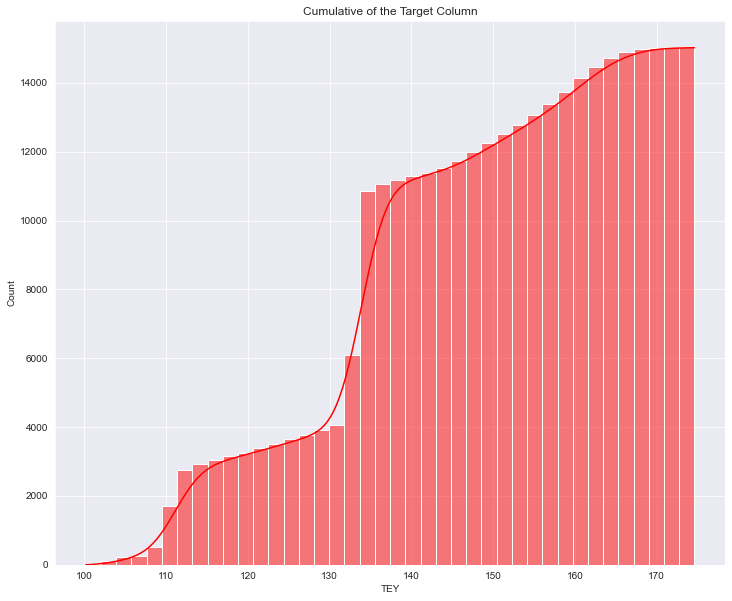

In [24]:
plt.figure(figsize = (12,10))
sns.histplot(turbine["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

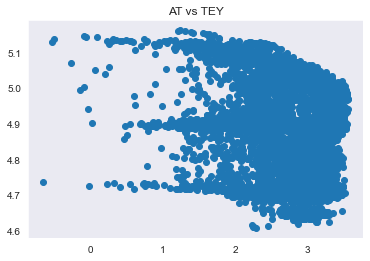

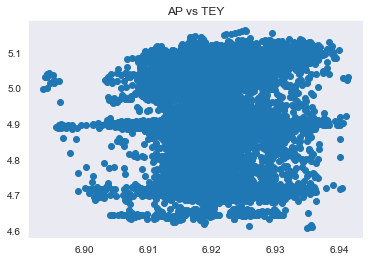

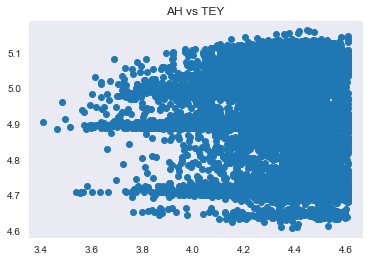

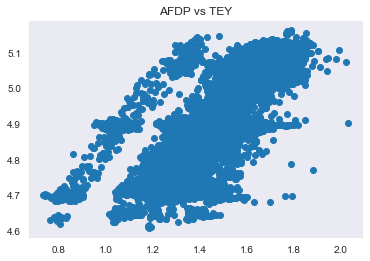

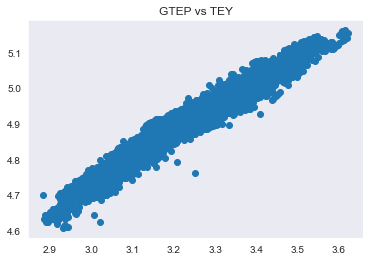

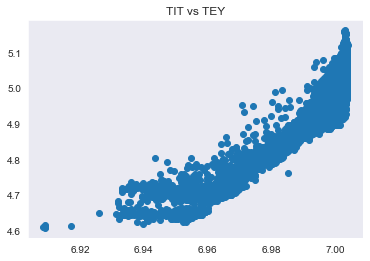

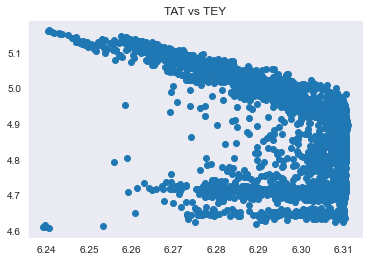

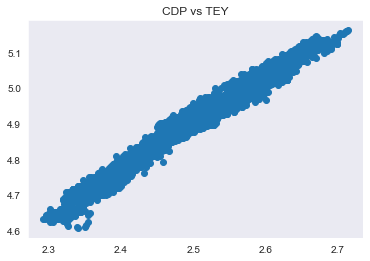

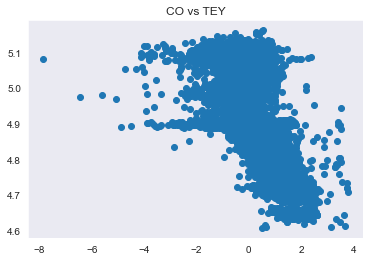

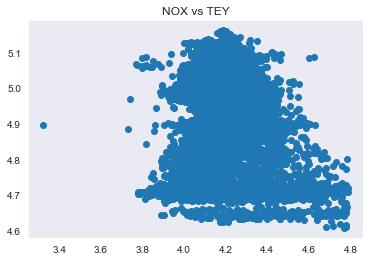

In [25]:
# Multivariate Analysis
for i in turbine.columns:
    if i!="TEY": 
        plt.scatter(np.log(turbine[i]), np.log(turbine['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

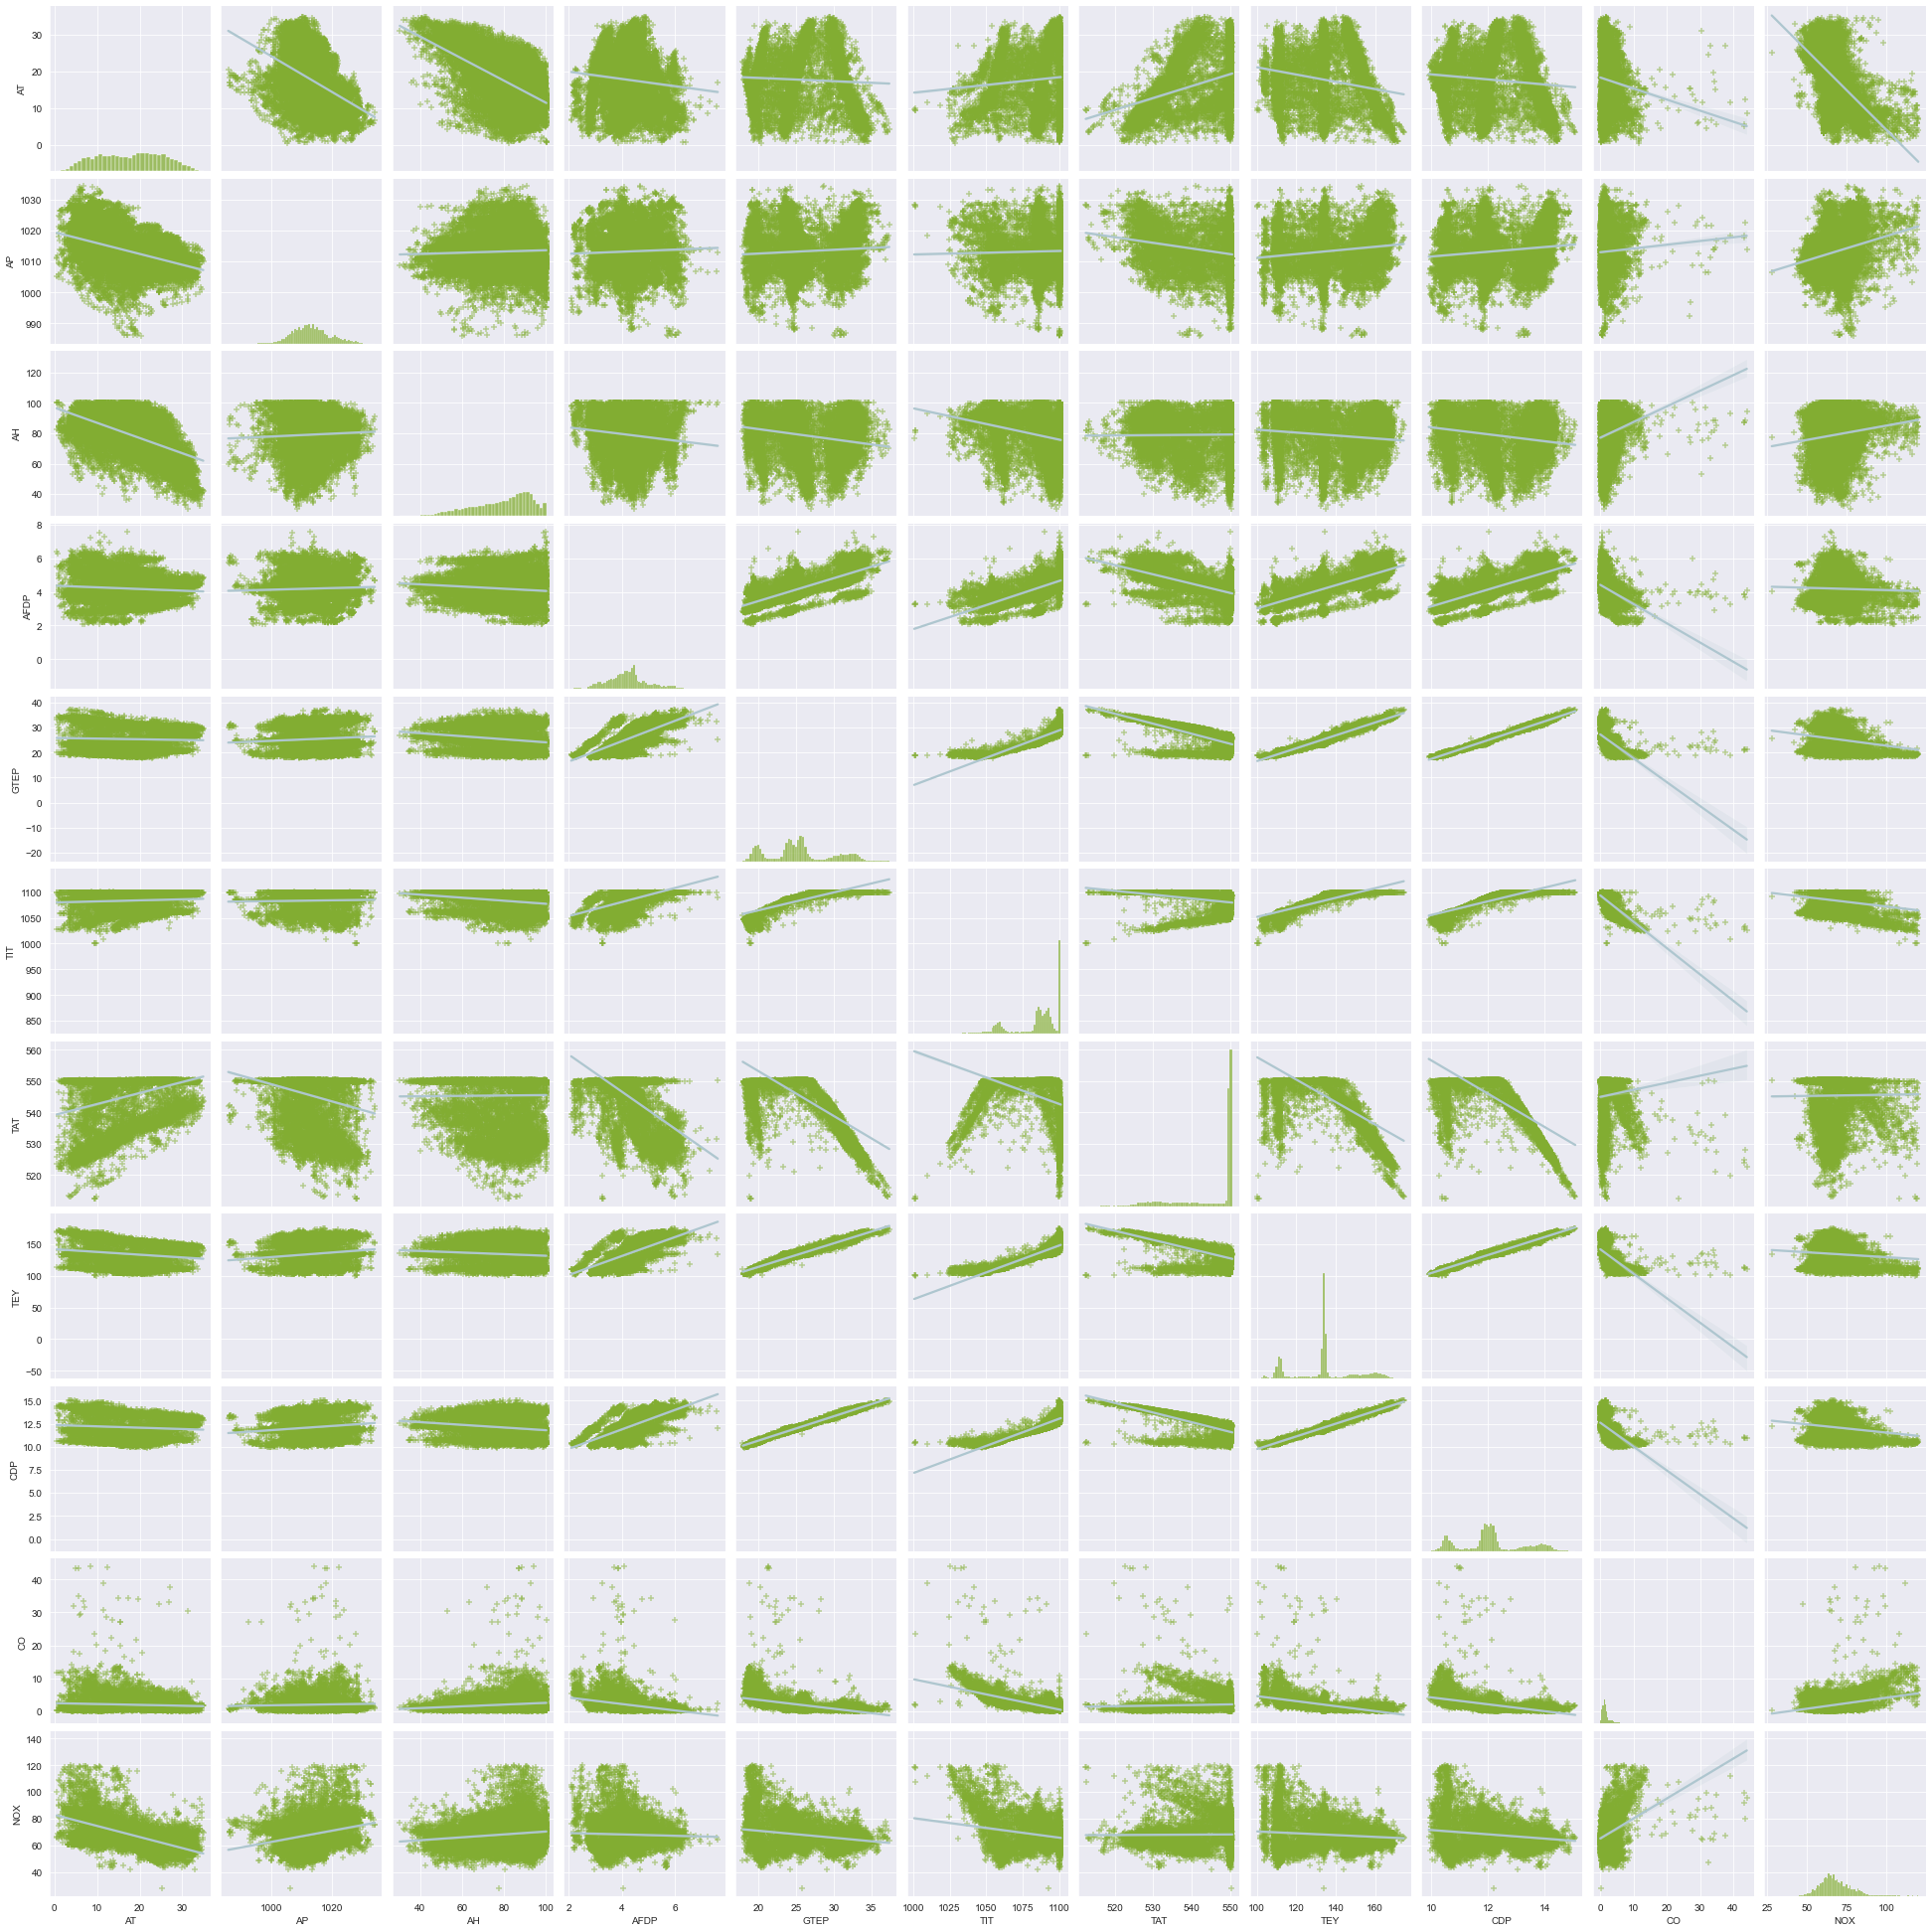

In [26]:
sns.pairplot(turbine,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
                 diag_kws= {'color': '#82ad32'})

<Figure size 1440x1440 with 0 Axes>

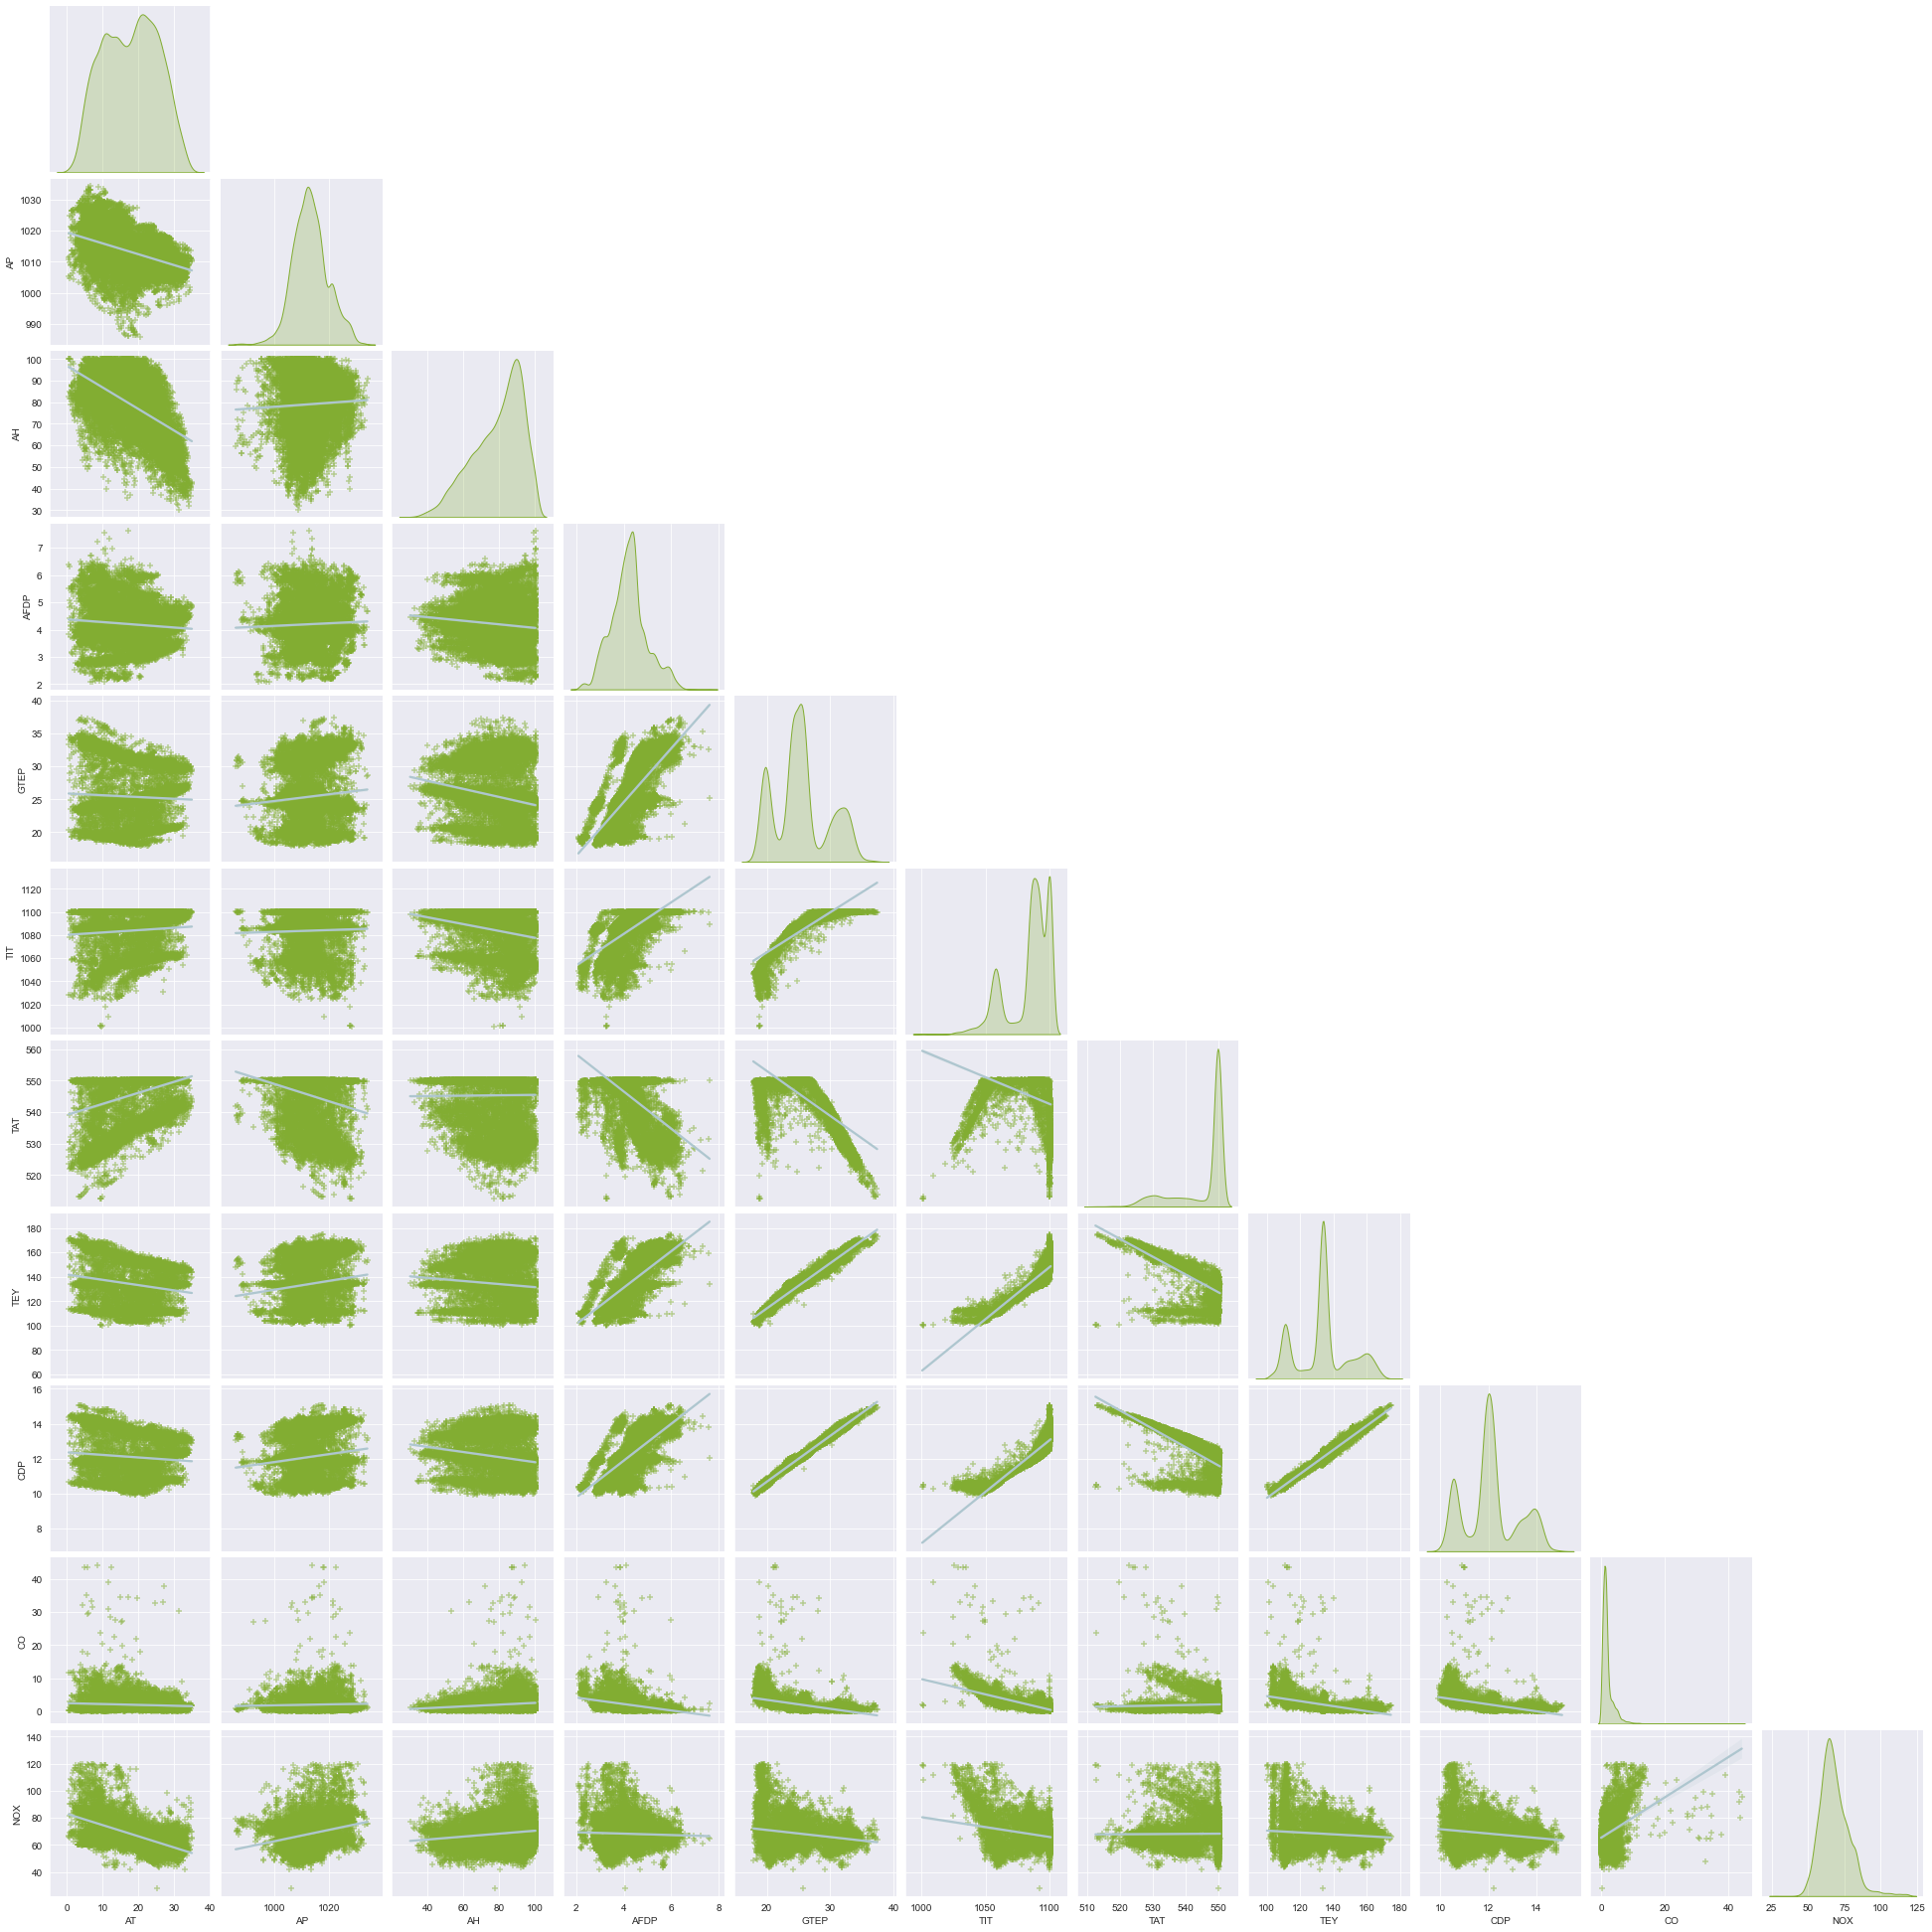

In [27]:
plt.figure(figsize=(20,20))
sns.pairplot(turbine,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
                 corner=True,
                 diag_kws= {'color': '#82ad32'})

C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\4214109568.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(turbine.corr(), dtype=np.bool)


<AxesSubplot:>

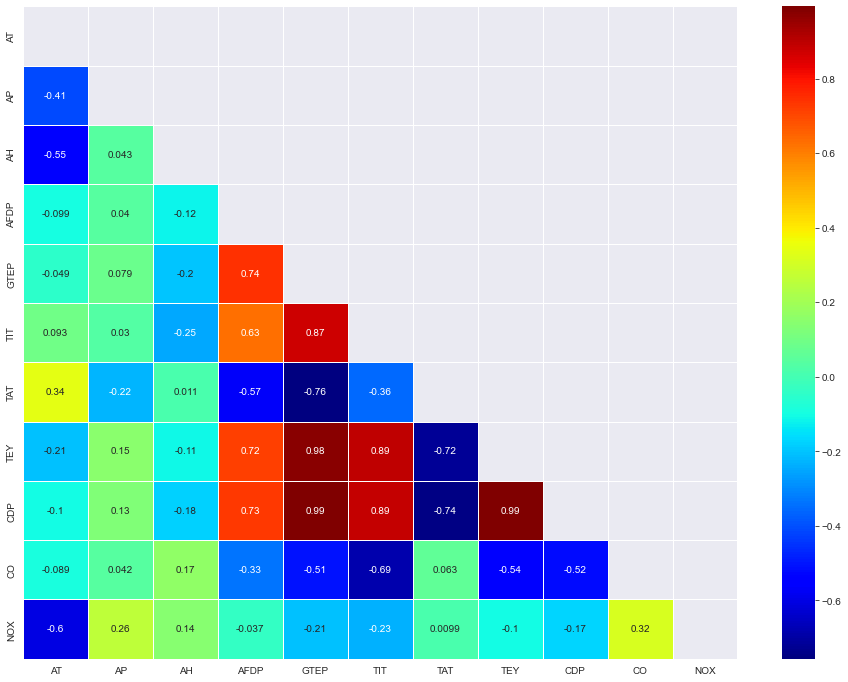

In [28]:
#correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(turbine.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [29]:
x = turbine.drop('TEY', axis=1)
y = turbine[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

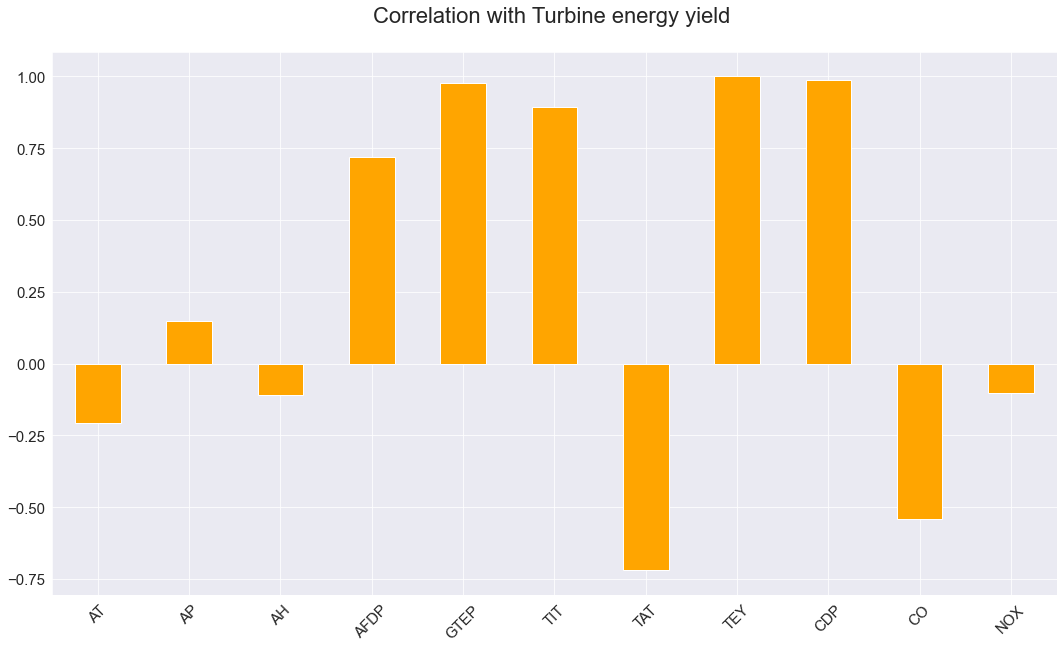

In [30]:
correlations = df.corrwith(turbine.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [31]:
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

C:\Users\sonali jante\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
scores = fit.scores_
scores

array([0.41256964, 0.13615126, 0.09746632, 0.6606737 , 1.60100799,
       1.32157773, 0.89311719, 1.71210089, 0.51270471, 0.30057368])

In [33]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.712101,CDP
4,1.601008,GTEP
5,1.321578,TIT
6,0.893117,TAT
3,0.660674,AFDP
8,0.512705,CO
0,0.412570,AT
9,0.300574,NOX
1,0.136151,AP
2,0.097466,AH


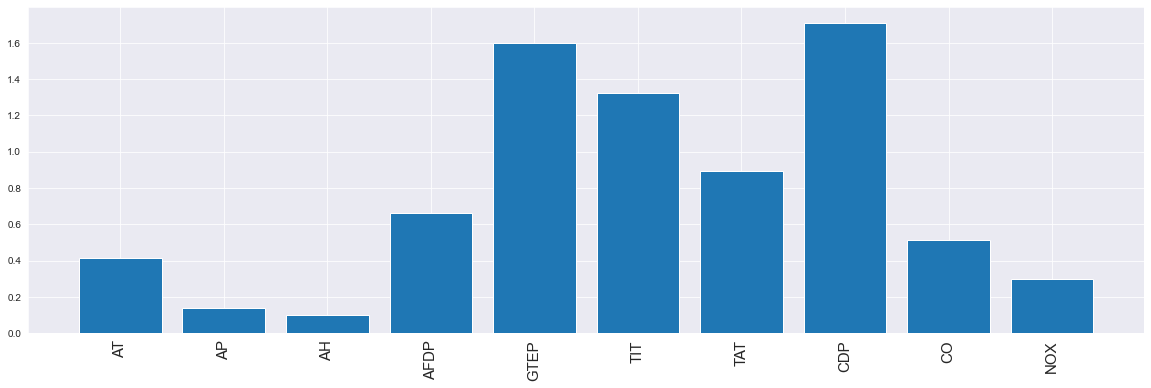

In [34]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

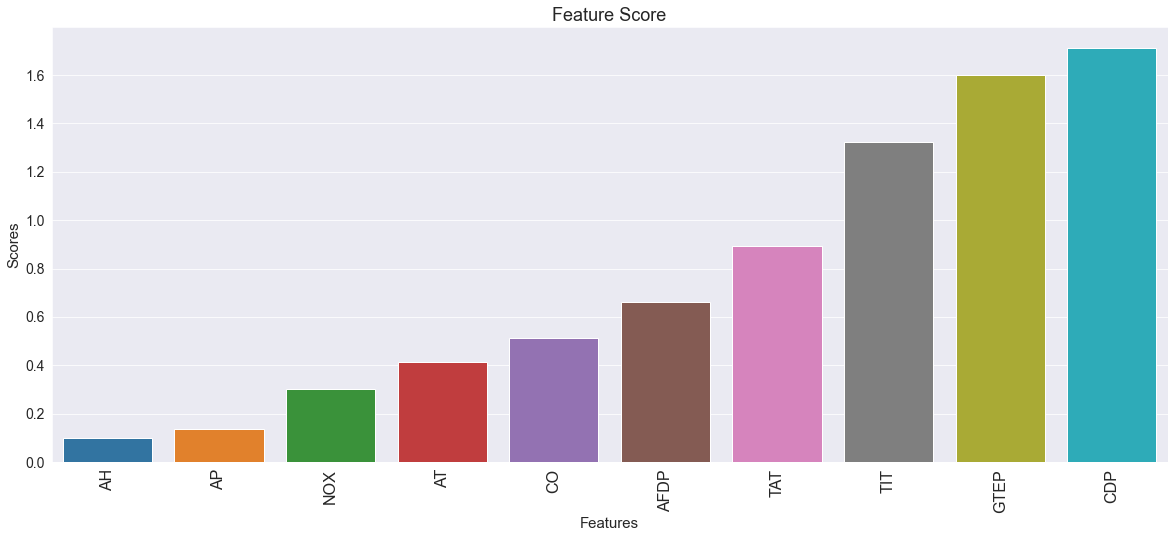

In [36]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score", size=18)
plt.show()

In [37]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.712101,CDP
4,1.601008,GTEP
5,1.321578,TIT
6,0.893117,TAT
3,0.660674,AFDP
8,0.512705,CO
0,0.412570,AT
9,0.300574,NOX
1,0.136151,AP
2,0.097466,AH


In [38]:
model_data = turbine[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [39]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [40]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909
...,...,...,...,...,...,...,...,...
15034,-1.543161,-1.498657,-2.063184,0.103453,-0.865850,1.145792,-1.153182,-1.426381
15035,-1.513247,-1.438759,-2.268905,-0.276638,-0.913470,1.293578,-1.303986,-1.415642
15036,-1.467922,-1.410967,-2.789257,-1.026650,-0.951488,2.695925,-1.386267,-1.516089
15037,-1.422598,-1.447624,-2.456474,-0.528337,-0.988848,1.924683,-1.420423,-1.481343


In [42]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP    0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT     -0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [43]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [45]:
#Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [49]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

In [50]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [51]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

Trial 5 Complete [00h 07m 55s]
val_mean_absolute_error: 0.02429557405412197

Best val_mean_absolute_error So Far: 0.02362661932905515
Total elapsed time: 00h 39m 24s
INFO:tensorflow:Oracle triggered exit


In [52]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 64
units_3: 64
units_4: 64
units_5: 64
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 96
units_11: 64
units_12: 64
units_13: 64
units_14: 64
units_15: 64
units_16: 64
units_17: 64
units_18: 32
Score: 0.02362661932905515
Trial summary
Hyperparameters:
num_layers: 12
units_0: 32
units_1: 64
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
Score: 0.02417735879619916
Trial summary
Hyperparameters:
num_layers: 12
units_0: 96
units_1: 64
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 64
units_5: 96
units_6: 32
units_7: 96
units_8: 64
units_9: 96
units_10: 64
units_11: 96
units_12: 64
units_13: 32
units_14: 96
units_15: 64
units_16: 64
units_17: 32
units_18: 96
Score: 0.024203686664501827
Trial summary
Hyperparamete

In [53]:
#Hyperparameter Tuning: Optimal Batch_size, Number of Epochs
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [54]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\2023109169.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 =KerasRegressor(build_fn=create_model,verbose=0)


In [55]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.065 total time=  12.3s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.033 total time=   8.5s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.041 total time=   8.0s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.039 total time=   8.0s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.045 total time=   8.1s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=40, epochs=100;, score=-0.048 total time=  20.2s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=40, epochs=100;, score=-0.033 total time=  19.2s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=40, epochs=100;, score=-0.030 total time=  19.1s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=40, epochs=100;, score=-0.032 total time=  19.7s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=40, epochs=100;, score=-0.034 total time=  19.3s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=40, epochs=200;, score=-0.033 total time=  36.2s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [56]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.030907481908798218, using {'batch_size': 20, 'epochs': 200}
-0.04487292543053627,0.010970792997633655 with {'batch_size': 10, 'epochs': 10}
-0.040145174413919446,0.005990626219790672 with {'batch_size': 10, 'epochs': 50}
-0.03620491549372673,0.00524205694102184 with {'batch_size': 10, 'epochs': 100}
-0.03470791652798653,0.004212676537781464 with {'batch_size': 10, 'epochs': 200}
-0.05612991526722908,0.019999011542878493 with {'batch_size': 20, 'epochs': 10}
-0.03307594209909439,0.004338130322063032 with {'batch_size': 20, 'epochs': 50}
-0.036791014671325686,0.008540444602001197 with {'batch_size': 20, 'epochs': 100}
-0.030907481908798218,0.002112663207127337 with {'batch_size': 20, 'epochs': 200}
-0.04014952704310417,0.004218298353437995 with {'batch_size': 40, 'epochs': 10}
-0.03544252254068851,0.005468393481923364 with {'batch_size': 40, 'epochs': 50}
-0.035454803705215455,0.006508774040581724 with {'batch_size': 40, 'epochs': 100}
-0.03580617569386959,0.004354434506857654 wi

In [57]:
#Hyperparameter Tuning: Optimal Droupout rate
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [58]:
model2=KerasRegressor(build_fn=create_model,batch_size=20,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\1994083369.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2=KerasRegressor(build_fn=create_model,batch_size=20,epochs=200,verbose=0)


In [59]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.045 total time= 1.1min
[CV 2/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.034 total time= 1.1min
[CV 3/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.036 total time= 1.1min
[CV 4/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.033 total time= 1.1min
[CV 5/5; 1/6] START dropout_rate=0.0............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.050 total time= 1.1min
[CV 1/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/6] END ............dropout_rate=0.1;, score=-0.035 total time= 1.1min
[CV 2/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/6] END ............dropout_rate=0.1;, score=-0.030 total time= 1.1min
[CV 3/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/6] END ............dropout_rate=0.1;, score=-0.027 total time= 1.1min
[CV 4/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/6] END ............dropout_rate=0.1;, score=-0.038 total time= 1.0min
[CV 5/5; 2/6] START dropout_rate=0.1............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/6] END ............dropout_rate=0.1;, score=-0.044 total time= 1.0min
[CV 1/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/6] END ............dropout_rate=0.2;, score=-0.029 total time= 1.1min
[CV 2/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/6] END ............dropout_rate=0.2;, score=-0.032 total time= 1.0min
[CV 3/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/6] END ............dropout_rate=0.2;, score=-0.035 total time= 1.1min
[CV 4/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/6] END ............dropout_rate=0.2;, score=-0.037 total time= 1.1min
[CV 5/5; 3/6] START dropout_rate=0.2............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/6] END ............dropout_rate=0.2;, score=-0.038 total time= 1.1min
[CV 1/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/6] END ............dropout_rate=0.3;, score=-0.034 total time= 1.1min
[CV 2/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/6] END ............dropout_rate=0.3;, score=-0.034 total time= 1.1min
[CV 3/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/6] END ............dropout_rate=0.3;, score=-0.033 total time= 1.1min
[CV 4/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/6] END ............dropout_rate=0.3;, score=-0.038 total time= 1.0min
[CV 5/5; 4/6] START dropout_rate=0.3............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/6] END ............dropout_rate=0.3;, score=-0.038 total time= 1.1min
[CV 1/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/6] END ............dropout_rate=0.4;, score=-0.030 total time= 1.1min
[CV 2/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/6] END ............dropout_rate=0.4;, score=-0.031 total time= 1.1min
[CV 3/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/6] END ............dropout_rate=0.4;, score=-0.030 total time= 1.1min
[CV 4/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/6] END ............dropout_rate=0.4;, score=-0.044 total time= 1.1min
[CV 5/5; 5/6] START dropout_rate=0.4............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/6] END ............dropout_rate=0.4;, score=-0.035 total time= 1.1min
[CV 1/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/6] END ............dropout_rate=0.5;, score=-0.040 total time= 1.1min
[CV 2/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/6] END ............dropout_rate=0.5;, score=-0.030 total time= 1.1min
[CV 3/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/6] END ............dropout_rate=0.5;, score=-0.030 total time= 1.1min
[CV 4/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/6] END ............dropout_rate=0.5;, score=-0.034 total time= 1.1min
[CV 5/5; 6/6] START dropout_rate=0.5............................................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/6] END ............dropout_rate=0.5;, score=-0.033 total time= 1.1min


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [60]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.033348367735743525, using {'dropout_rate': 0.5}
-0.03978459909558296,0.0067947081776856865 with {'dropout_rate': 0.0}
-0.03477308712899685,0.005779618283984495 with {'dropout_rate': 0.1}
-0.03405336365103721,0.0031352379748046224 with {'dropout_rate': 0.2}
-0.03525670021772385,0.002104285974152438 with {'dropout_rate': 0.3}
-0.033933992683887484,0.005185175759539631 with {'dropout_rate': 0.4}
-0.033348367735743525,0.0035974150440477143 with {'dropout_rate': 0.5}


In [61]:
#Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.5))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.5))
    model3.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [62]:
model3=KerasRegressor(build_fn=create_model,batch_size=20,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3207685315.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3=KerasRegressor(build_fn=create_model,batch_size=20,epochs=200,verbose=0)


In [63]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-1.051 total time= 1.5min
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-0.939 total time= 1.4min
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-1.007 total time= 1.4min
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-1.068 total time= 1.4min
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-1.039 total time= 1.4min
[CV 1/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END activation_function=softmax, init=uniform;, score=-1.032 total time= 1.4min
[CV 2/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.744 total time= 1.4min
[CV 3/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.857 total time= 1.4min
[CV 4/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.949 total time= 1.4min
[CV 5/5; 2/9] START activation_function=softmax, init=uniform...................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END activation_function=softmax, init=uniform;, score=-0.960 total time= 1.4min
[CV 1/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END activation_function=softmax, init=zero;, score=-0.990 total time= 1.4min
[CV 2/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END activation_function=softmax, init=zero;, score=-0.914 total time= 1.4min
[CV 3/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END activation_function=softmax, init=zero;, score=-0.958 total time= 1.4min
[CV 4/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END activation_function=softmax, init=zero;, score=-0.931 total time= 1.4min
[CV 5/5; 3/9] START activation_function=softmax, init=zero......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END activation_function=softmax, init=zero;, score=-1.009 total time= 1.4min
[CV 1/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END activation_function=tanh, init=normal;, score=-0.925 total time= 1.4min
[CV 2/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END activation_function=tanh, init=normal;, score=-0.987 total time= 1.4min
[CV 3/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END activation_function=tanh, init=normal;, score=-0.973 total time= 1.5min
[CV 4/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END activation_function=tanh, init=normal;, score=-0.991 total time= 1.5min
[CV 5/5; 4/9] START activation_function=tanh, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END activation_function=tanh, init=normal;, score=-0.825 total time= 1.4min
[CV 1/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END activation_function=tanh, init=uniform;, score=-1.047 total time= 1.4min
[CV 2/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END activation_function=tanh, init=uniform;, score=-1.038 total time= 1.4min
[CV 3/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END activation_function=tanh, init=uniform;, score=-0.981 total time= 1.4min
[CV 4/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END activation_function=tanh, init=uniform;, score=-0.954 total time= 1.5min
[CV 5/5; 5/9] START activation_function=tanh, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END activation_function=tanh, init=uniform;, score=-1.021 total time= 1.5min
[CV 1/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END activation_function=tanh, init=zero;, score=-0.996 total time= 1.5min
[CV 2/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END activation_function=tanh, init=zero;, score=-0.971 total time= 1.4min
[CV 3/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END activation_function=tanh, init=zero;, score=-0.803 total time= 1.4min
[CV 4/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END activation_function=tanh, init=zero;, score=-0.960 total time= 1.4min
[CV 5/5; 6/9] START activation_function=tanh, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END activation_function=tanh, init=zero;, score=-1.060 total time= 1.4min
[CV 1/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END activation_function=relu, init=normal;, score=-1.038 total time= 1.4min
[CV 2/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END activation_function=relu, init=normal;, score=-0.813 total time= 1.4min
[CV 3/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END activation_function=relu, init=normal;, score=-0.824 total time= 1.4min
[CV 4/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END activation_function=relu, init=normal;, score=-0.956 total time= 1.4min
[CV 5/5; 7/9] START activation_function=relu, init=normal.......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END activation_function=relu, init=normal;, score=-1.017 total time= 1.4min
[CV 1/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END activation_function=relu, init=uniform;, score=-0.983 total time= 1.4min
[CV 2/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END activation_function=relu, init=uniform;, score=-0.953 total time= 1.5min
[CV 3/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END activation_function=relu, init=uniform;, score=-1.075 total time= 1.4min
[CV 4/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END activation_function=relu, init=uniform;, score=-0.899 total time= 1.4min
[CV 5/5; 8/9] START activation_function=relu, init=uniform......................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END activation_function=relu, init=uniform;, score=-0.895 total time= 1.5min
[CV 1/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END activation_function=relu, init=zero;, score=-1.044 total time= 1.4min
[CV 2/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END activation_function=relu, init=zero;, score=-0.970 total time= 1.4min
[CV 3/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END activation_function=relu, init=zero;, score=-0.968 total time= 1.5min
[CV 4/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END activation_function=relu, init=zero;, score=-1.090 total time= 1.4min
[CV 5/5; 9/9] START activation_function=relu, init=zero.........................


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END activation_function=relu, init=zero;, score=-0.888 total time= 1.5min


C:\Users\sonali jante\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.9085865497589112, using {'activation_function': 'softmax', 'init': 'uniform'}
-1.0205699324607849,0.04558121946823904 with {'activation_function': 'softmax', 'init': 'normal'}
-0.9085865497589112,0.09929790604634166 with {'activation_function': 'softmax', 'init': 'uniform'}
-0.9603240251541137,0.03543482632135273 with {'activation_function': 'softmax', 'init': 'zero'}
-0.9402462601661682,0.0624602440948261 with {'activation_function': 'tanh', 'init': 'normal'}
-1.0083328127861022,0.03553082151111262 with {'activation_function': 'tanh', 'init': 'uniform'}
-0.957935380935669,0.08458491687870558 with {'activation_function': 'tanh', 'init': 'zero'}
-0.9294619679450988,0.09467704523978253 with {'activation_function': 'relu', 'init': 'normal'}
-0.9611904382705688,0.0658289915744715 with {'activation_function': 'relu', 'init': 'uniform'}
-0.9922561049461365,0.06944006331970473 with {'activation_function': 'relu', 'init': 'zero'}


In [65]:
#Model Building Neural Networks
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [66]:
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [67]:
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 2s 5ms/step - loss: 17628.7383 - mae: 131.8152 - mse: 17628.7383 - val_loss: 16801.6426 - val_mae: 128.6611 - val_mse: 16801.6426
Epoch 2/100
169/169 [==============================] - 1s 3ms/step - loss: 16309.9775 - mae: 126.7144 - mse: 16309.9775 - val_loss: 15756.2998 - val_mae: 124.5323 - val_mse: 15756.2998
Epoch 3/100
169/169 [==============================] - 1s 4ms/step - loss: 15338.7822 - mae: 122.8258 - mse: 15338.7822 - val_loss: 14840.1836 - val_mae: 120.7982 - val_mse: 14840.1836
Epoch 4/100
169/169 [==============================] - 1s 4ms/step - loss: 14456.1572 - mae: 119.1756 - mse: 14456.1572 - val_loss: 13988.8789 - val_mae: 117.2216 - val_mse: 13988.8789
Epoch 5/100
169/169 [==============================] - 1s 5ms/step - loss: 13628.3525 - mae: 115.6521 - mse: 13628.3525 - val_loss: 13185.6650 - val_mae: 113.7440 - val_mse: 13185.6650
Epoch 6/100
169/169 [==============================] - 1s 5ms/step - loss: 

169/169 [==============================] - 0s 3ms/step - loss: 337.5290 - mae: 15.2215 - mse: 337.5290 - val_loss: 318.7610 - val_mae: 14.7939 - val_mse: 318.7610
Epoch 47/100
169/169 [==============================] - 0s 3ms/step - loss: 314.7901 - mae: 14.5410 - mse: 314.7901 - val_loss: 299.0273 - val_mae: 14.1373 - val_mse: 299.0273
Epoch 48/100
169/169 [==============================] - 0s 3ms/step - loss: 296.9832 - mae: 13.9207 - mse: 296.9832 - val_loss: 283.7858 - val_mae: 13.5464 - val_mse: 283.7858
Epoch 49/100
169/169 [==============================] - 0s 3ms/step - loss: 283.3809 - mae: 13.3745 - mse: 283.3809 - val_loss: 272.3971 - val_mae: 13.0244 - val_mse: 272.3971
Epoch 50/100
169/169 [==============================] - 0s 3ms/step - loss: 273.2766 - mae: 12.8888 - mse: 273.2766 - val_loss: 264.0874 - val_mae: 12.5678 - val_mse: 264.0874
Epoch 51/100
169/169 [==============================] - 0s 3ms/step - loss: 265.9518 - mae: 12.4766 - mse: 265.9518 - val_loss: 258.2

169/169 [==============================] - 1s 3ms/step - loss: 0.7868 - mae: 0.5800 - mse: 0.7868 - val_loss: 0.7333 - val_mae: 0.5585 - val_mse: 0.7333
Epoch 95/100
169/169 [==============================] - 0s 3ms/step - loss: 0.7433 - mae: 0.5712 - mse: 0.7433 - val_loss: 0.7068 - val_mae: 0.5568 - val_mse: 0.7068
Epoch 96/100
169/169 [==============================] - 1s 3ms/step - loss: 0.7195 - mae: 0.5653 - mse: 0.7195 - val_loss: 0.6822 - val_mae: 0.5566 - val_mse: 0.6822
Epoch 97/100
169/169 [==============================] - 1s 3ms/step - loss: 0.6828 - mae: 0.5544 - mse: 0.6828 - val_loss: 0.6383 - val_mae: 0.5239 - val_mse: 0.6383
Epoch 98/100
169/169 [==============================] - 1s 3ms/step - loss: 0.6600 - mae: 0.5470 - mse: 0.6600 - val_loss: 0.6537 - val_mae: 0.5453 - val_mse: 0.6537
Epoch 99/100
169/169 [==============================] - 1s 3ms/step - loss: 0.6436 - mae: 0.5416 - mse: 0.6436 - val_loss: 0.6198 - val_mae: 0.5385 - val_mse: 0.6198
Epoch 100/100
169

In [68]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:        
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)
    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 2s 2ms/step


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


batch_size: 5 - epochs: 5 Accuracy: TEY    97.914095
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 

C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


10 Accuracy: TEY    99.543115
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.645762
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.604073
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: 

C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


TEY    80.809431
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.553453
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.661625
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.608194
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


batch_size: 15 - epochs: 5 Accuracy: TEY    58.806818
dtype: float64
94/94 [==============================] - 0s 2ms/step


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


batch_size: 15 - epochs: 10 Accuracy: TEY    89.835895
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 50 Accuracy: TEY    99.58007
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 15 - epochs: 100 Accuracy: TEY    99.624937
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 20 - epochs: 5 Accuracy: TEY    46.159149
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 20 - epochs: 10 Accuracy: TEY    81.070367
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 20 - epochs: 50 Accuracy: TEY    99.596013
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


94/94 [==============================] - 0s 2ms/step
batch_size: 20 - epochs: 100 Accuracy: TEY    99.57718
dtype: float64


C:\Users\sonali jante\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\sonali jante\AppData\Local\Temp\ipykernel_9052\3373606772.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],


,batchsize,epochs,Accuracy
0,5,5,TEY 97.914095 dtype: float64
0,5,10,TEY 99.543115 dtype: float64
0,5,50,TEY 99.645762 dtype: float64
0,5,100,TEY 99.604073 dtype: float64
0,10,5,TEY 80.809431 dtype: float64
0,10,10,TEY 98.553453 dtype: float64
0,10,50,TEY 99.661625 dtype: float64
0,10,100,TEY 99.608194 dtype: float64
0,15,5,TEY 58.806818 dtype: float64
0,15,10,TEY 89.835895 dtype: float64


In [81]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=10 , epochs = 50, verbose=0)

In [86]:
model.history

In [89]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 2ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.772614
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.795540
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.254883
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.213577
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.523643
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,114.383743
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.856277
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.331223
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,160.832672
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,161.634567


In [90]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

In [91]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.55035759372896


,Actual,Predicted,APE %
13312,134.46,134.772614,0.232496
12627,111.88,112.795540,0.818323
6393,133.72,134.254883,0.400002
4990,133.79,134.213577,0.316599
12462,110.77,111.523643,0.680368


In [92]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.772614,0.232496,-0.002325
1,111.88,112.795540,0.818323,-0.008183
2,133.72,134.254883,0.400002,-0.004000
3,133.79,134.213577,0.316599,-0.003166
4,110.77,111.523643,0.680368,-0.006804
...,...,...,...,...
3003,119.25,119.582428,0.278766,-0.002788
3004,133.74,134.150101,0.306640,-0.003066
3005,146.31,147.352844,0.712763,-0.007128
3006,150.07,150.014389,0.037057,0.000371


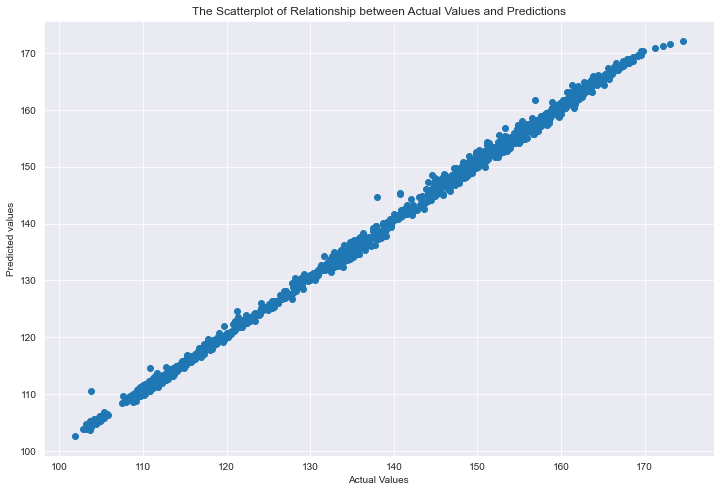

In [93]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [94]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.5968080194960251
MSE: 0.6197041807183398
RMSE: 0.7872129195575615


In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 1s 2ms/step
R2_score (train):  0.9984118558743956
R2_score (test):  0.9975250404295649


In [97]:
#Evaluation of  the explained variance score (R^2)
print('This shows our model predict {}% of the target correctly'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

This shows our model predict 99.85% of the target correctly


C:\Users\sonali jante\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

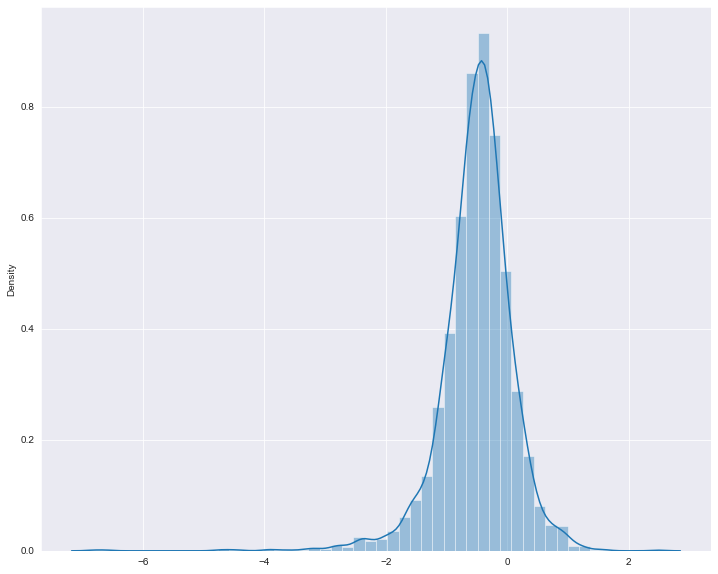

In [98]:
#Now we will visualize the differences between our predictions and actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50)

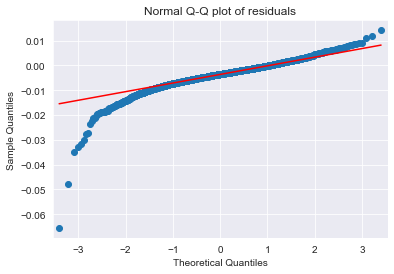

In [99]:
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()